<a href="https://colab.research.google.com/github/julianovale/ferramentas/blob/main/Aula_Keras_DataICMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# MLP

In [2]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()

print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
def plot_image_grid(imgs, n, m, figsize=(6,6)):
    fig, axes = plt.subplots(n, m, figsize=figsize)
    for img, ax in zip(imgs, axes.flatten()):
        ax.imshow(img, cmap='gray')
        ax.set(xticks=[], yticks=[]) # plota a numeração dos eixos como vazios

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


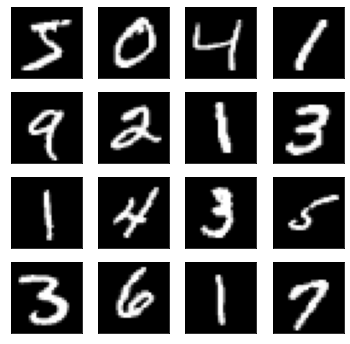

In [4]:
print(y_train[:16])
plot_image_grid(x_train[:16], 4, 4)

## pré-processamento dos dados

In [5]:
x_train = x_train.reshape(-1, 28 * 28) # -1 diz que a última dimensão (-1) é redimensionada para 28 * 28 (igual a 784)
x_test = x_test.reshape(-1, 28 * 28)

x_train = x_train/255
x_test = x_test/255

print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)

x_train shape (60000, 784)
x_test shape (10000, 784)


## Definindo a arquitetura (Sequential API)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Dense = Fully conected

model = Sequential([
    Dense(units=128, activation='relu', input_shape=(784,), name='camada_1'), # 784 é tamanho do vetor (28*28)
    Dense(units=64, activation='relu', name='camada_2'), 
    Dense(units=10, activation='softmax', name='camada_3'),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 camada_1 (Dense)            (None, 128)               100480    
                                                                 
 camada_2 (Dense)            (None, 64)                8256      
                                                                 
 camada_3 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


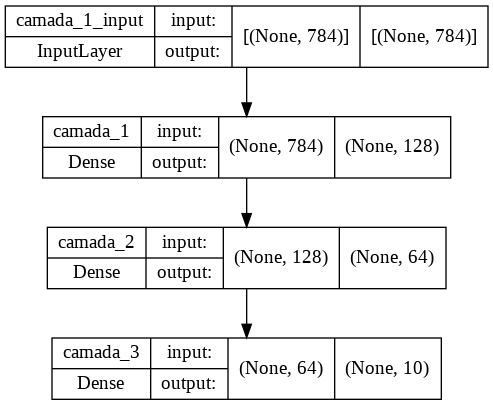

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [9]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=1e-2, momentum=0.9)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treinando o modelo

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

save_model_callback = ModelCheckpoint('model_checkpoint')

history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=5,
                    callbacks=[save_model_callback])

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2817 - accuracy: 0.9158
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1156 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0820 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0645 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9834


Text(0.5, 1.0, 'Accuracy')

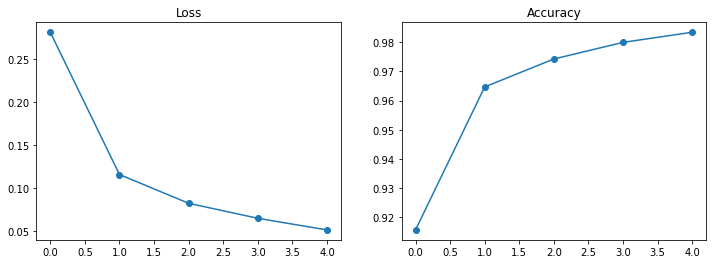

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'], '-o')
plt.title('Loss')

plt.subplot(122)
plt.plot(history.history['accuracy'], '-o')
plt.title('Accuracy')

## Avaliando o modelo

In [12]:
model.predict(x_test) # gera um conjunto de arrays

array([[2.59308081e-07, 1.22763623e-07, 3.03903198e-05, ...,
        9.99681354e-01, 1.31646948e-06, 2.09041173e-05],
       [3.80886291e-08, 3.87725100e-04, 9.99570072e-01, ...,
        3.46472930e-08, 1.05260642e-06, 1.72368879e-12],
       [1.58026481e-07, 9.98395503e-01, 1.80377727e-04, ...,
        3.47242487e-04, 7.88041682e-04, 1.21837775e-06],
       ...,
       [4.43219300e-13, 1.10898561e-10, 4.23128600e-13, ...,
        7.81015608e-09, 2.58413690e-09, 4.21939319e-08],
       [2.16029694e-10, 2.00301525e-10, 2.68573185e-12, ...,
        5.18871925e-11, 1.43248769e-06, 5.69939963e-11],
       [1.12587895e-08, 3.30396404e-08, 3.61068935e-08, ...,
        5.62537994e-12, 3.28520378e-10, 7.84000555e-12]], dtype=float32)

In [13]:
model.predict(x_test)[0] # verificando a primeira array

array([2.5930808e-07, 1.2276362e-07, 3.0390320e-05, 2.6117329e-04,
       2.5870559e-09, 4.5433985e-06, 5.0229310e-11, 9.9968135e-01,
       1.3164695e-06, 2.0904117e-05], dtype=float32)

In [14]:
np.argmax(model.predict(x_test)[0]) # verificando qual seria a classe (a maior probabilidade)

7

In [15]:
y_pred = model.predict(x_test)

accuracy = np.mean(y_test == np.argmax(y_pred, axis=1))
print(accuracy)

0.9759


In [16]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss', loss)
print('Accuracy', accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.0815 - accuracy: 0.9759
Loss 0.08150331676006317
Accuracy 0.9758999943733215


## Definindo a arquitetura II (Funcional API)

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

input = Input(shape=(784,))
x = Dense(units=128, activation='relu')(input)
x = Dense(units=64, activation='relu')(x) 
output = Dense(units=10, activation='softmax')(x)

model = Model(input, [output, x])

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


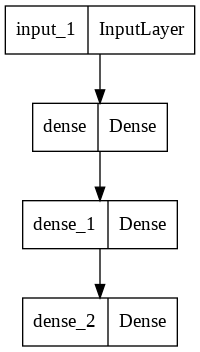

In [19]:
from keras.utils.vis_utils import plot_model
plot_model(model)

# CNN

## Lendo dados e preprocessamento

In [20]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()

print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [21]:
x_train = np.expand_dims(x_train, -1) 
x_test = np.expand_dims(x_test, -1)

x_train = x_train/255
x_test = x_test/255

print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)

x_train shape (60000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)


## Definindo a arquitetura

In [22]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

In [23]:
def build_model():
    input = Input(shape=(28, 28, 1))

    x = Conv2D(filters=8, kernel_size=3, activation='relu')(input)
    x = Conv2D(filters=16, kernel_size=3, activation='relu')(x)
    x = MaxPool2D(pool_size=(2,2))(x)

    x = Conv2D(filters=32, kernel_size=3, activation='relu')(x)
    x = MaxPool2D(pool_size=(2,2))(x)

    x = Flatten()(x)
    output = Dense(units=10, activation='softmax')(x)

    model = Model(input, output)
    model.summary()

    return model

In [24]:
model = build_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                       

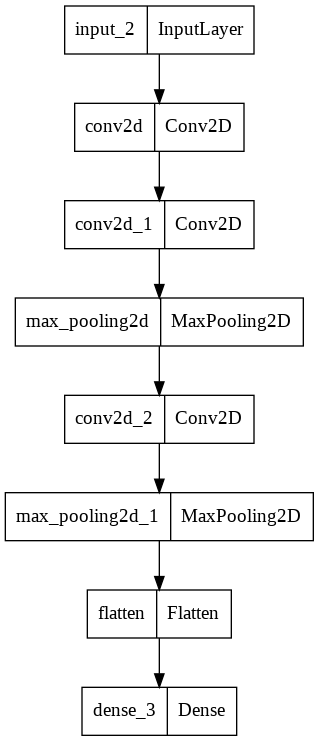

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [26]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=1e-2, momentum=0.9)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treinando o modelo

In [27]:
from gc import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

cb = ModelCheckpoint('model_checkpoint')

history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.2,
                    callbacks=[cb])

Epoch 1/10
1500/1500 [==============================] - 17s 7ms/step - loss: 0.1996 - accuracy: 0.9370 - val_loss: 0.0873 - val_accuracy: 0.9749
Epoch 2/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0611 - accuracy: 0.9818 - val_loss: 0.0618 - val_accuracy: 0.9812
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0454 - val_accuracy: 0.9858
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0514 - val_accuracy: 0.9853
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0475 - val_accuracy: 0.9869
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.0485 - val_accuracy: 0.9867
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0460 - val_accur

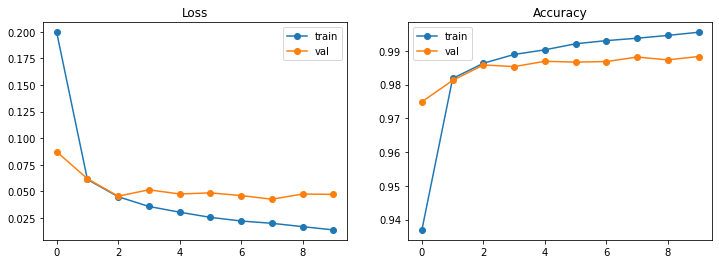

In [29]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'], '-o', label='train')
plt.plot(history.history['val_loss'], '-o', label='val')
plt.title('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-o', label='train')
plt.plot(history.history['val_accuracy'], '-o', label='val')
plt.title('Accuracy')
plt.legend()

In [34]:
model2 = build_model()
model2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.load_weights('model_checkpoint')
model2.evaluate(x_test, y_test)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                       

[0.031482771039009094, 0.9908999800682068]